In [7]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Returns the relative path of all pictures in the pictures folder.
def readAllImages():
    pictureNames = os.listdir("./pictures/")
    for i in range(len(pictureNames)):
        pictureNames[i] = "./pictures/" + pictureNames[i]
    return pictureNames

# Returns the average of n number of images.
def sumImages(n, images):
    #The image which will store the summation of the noisy images
    baseImage = np.zeros(cv2.imread(images[0]).shape)
    #Sum the images
    for i in images:
        image = cv2.imread(i,cv2.IMREAD_COLOR)
        baseImage += image
    #Take the average of the summed image
    baseImage = baseImage // n
    #Cast the image to uint8
    baseImage = baseImage.astype(np.uint8)
    return baseImage

In [9]:
numberOfImages = [5,10,20,50,80]
imageList = []
images = readAllImages()
for number in numberOfImages:
    summedImage = sumImages(number, images[:number])
    cv2.imwrite("average_of_{0}.jpg".format(number), summedImage)
    imageList += [summedImage]

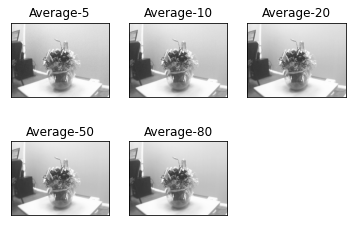

In [10]:
titles = ['Average-5','Average-10','Average-20','Average-50','Average-80']

for i in range(len(imageList)):
    plt.subplot(2,3,i+1),plt.imshow(imageList[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

